In [0]:
!rm -r ./cleaned_kickstarted_dataset

# Kickstarter project
## Data visualization

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Loading the data
We clone the dataset repository and then read the CSV files

In [0]:
!git clone https://github.com/Strongkong/cleaned_kickstarted_dataset

In [0]:
folder = './cleaned_kickstarted_dataset/'

In [0]:
test_joined_df =                  pd.read_csv(folder+"test_joined.csv", encoding='utf-8', sep=',')
english_ids_df =                  pd.read_csv(folder+"english_ids.csv", encoding='utf-8', sep='\t')
test_cleaned_text_semicolon_df =  pd.read_csv(folder+"test_cleaned_text.csv", encoding='utf-8', sep='\t')

### Trim header names

In [0]:
test_joined_df = test_joined_df.rename(columns=lambda x: x.strip())


### Concatenate them to get projects written in english + cleaned texts

In [0]:
df = pd.merge(test_joined_df, english_ids_df, how='inner', on=['ID'])
df = pd.merge(df, test_cleaned_text_semicolon_df, how='inner', on=['ID'])

## How much USD was pledged how often

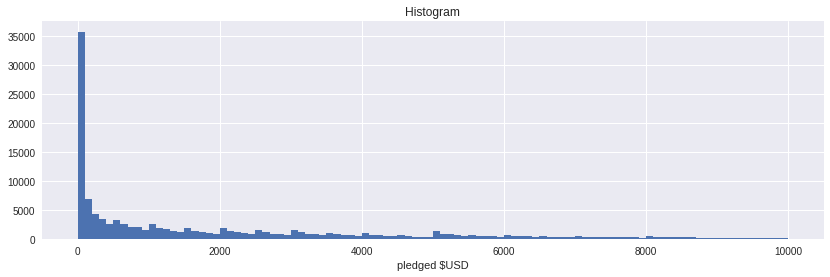

In [8]:
# plot a histogram of usd_pledged_real, we might also want to predict this
df[df['usd_pledged_real'] < 1e+4].usd_pledged_real.hist(bins=100, figsize=(14,4))
plt.xlabel('pledged $USD')
plt.title('Histogram');

## Backers and pledged USD

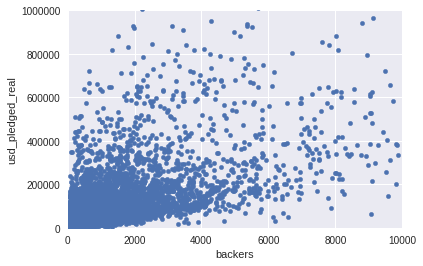

In [9]:
df[['usd_pledged_real', 'backers']].plot(x='backers', y='usd_pledged_real', kind='scatter', xlim=(0,10000), ylim=(0, 1000000))

## USD Pledged and goals

### All of them

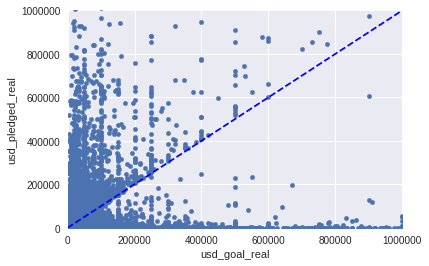

In [10]:
ax = df[['usd_pledged_real', 'usd_goal_real']].plot(x='usd_goal_real', y='usd_pledged_real', kind='scatter', xlim=(0,1000000), ylim=(0, 1000000))
ax.plot([0,1000000], [0,1000000], color='b', linestyle='dashed')

### By main category

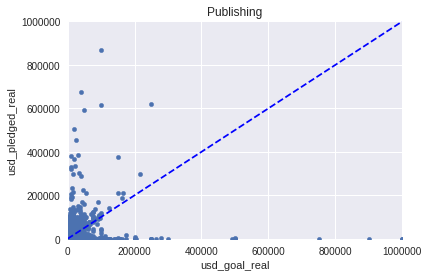

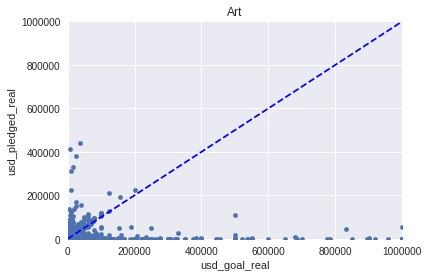

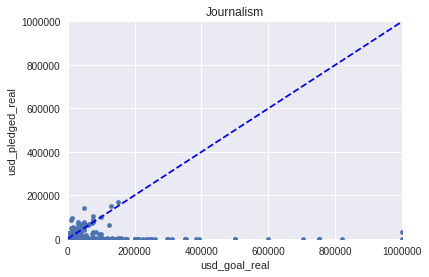

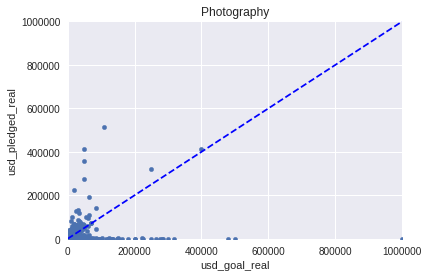

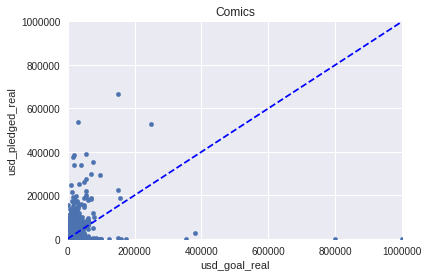

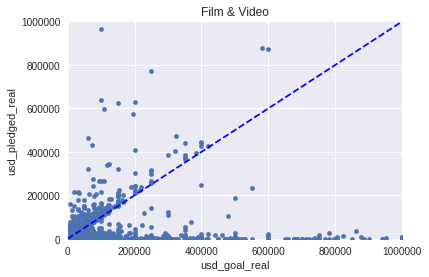

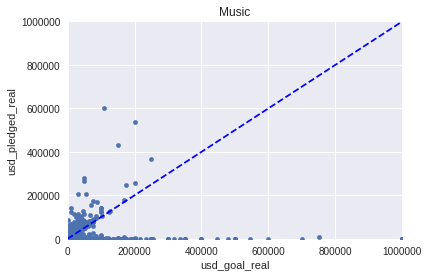

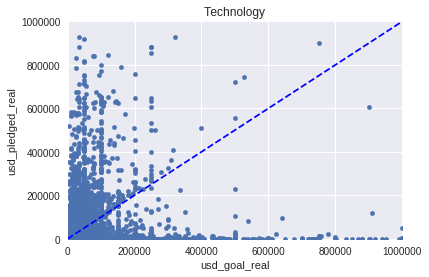

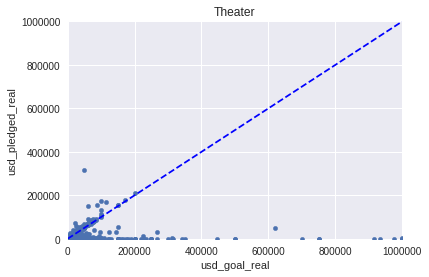

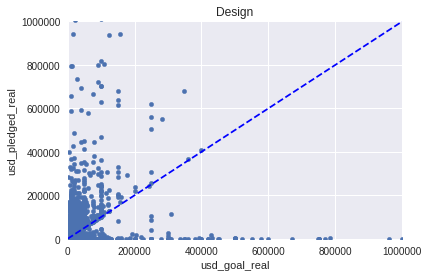

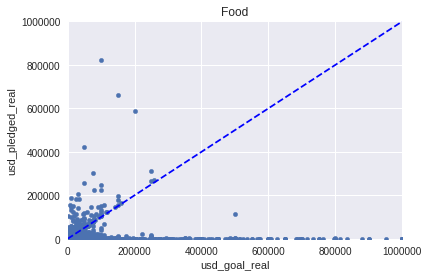

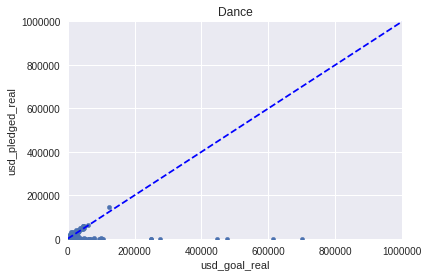

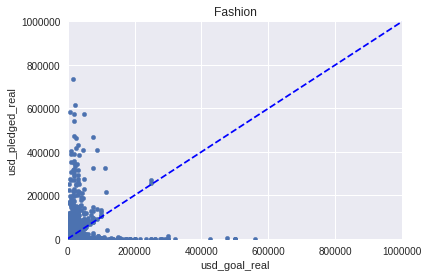

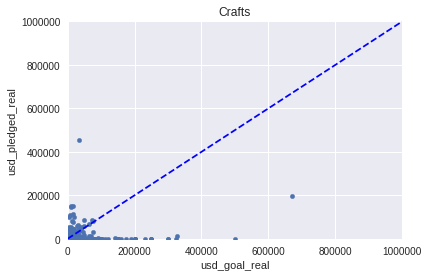

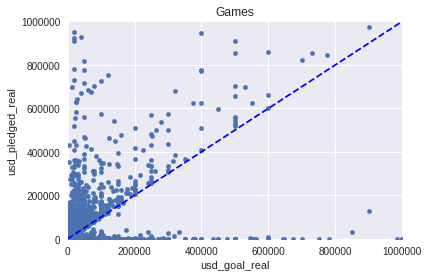

In [11]:
df3 = df[['usd_pledged_real', 'usd_goal_real', 'state', 'main_category']]
for cat in df['main_category'].unique():
  ax = df3[df3['main_category'] == cat].plot(title=cat,x='usd_goal_real', y='usd_pledged_real', kind='scatter', xlim=(0,1000000), ylim=(0, 1000000))
  ax.plot([0,1000000], [0,1000000], color='b', linestyle='dashed')

#### Plotting the Games category in a bigger plot

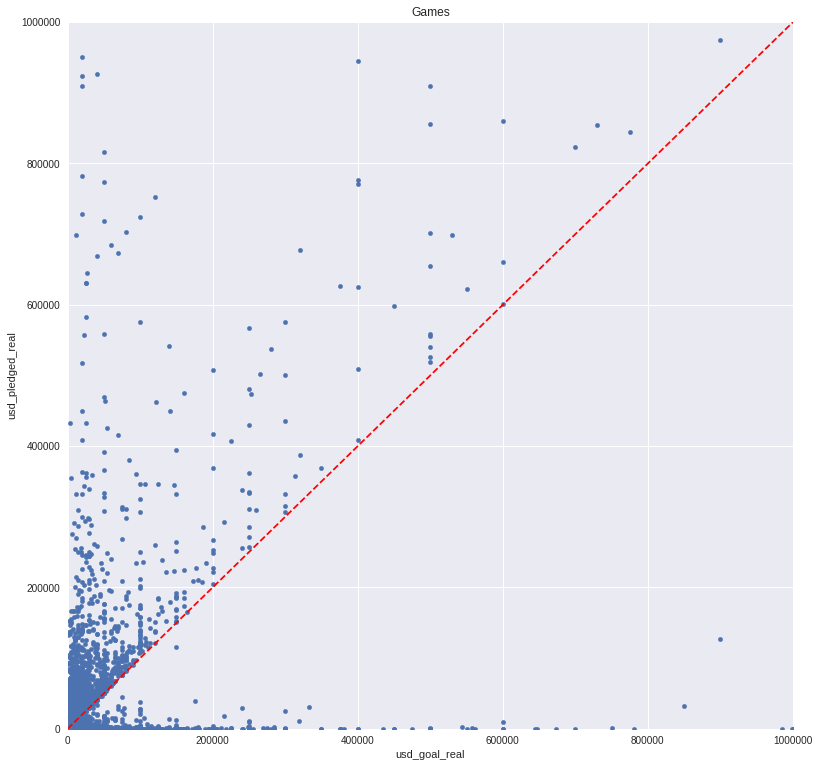

In [12]:
df3 = df[['usd_pledged_real', 'usd_goal_real', 'state', 'main_category']]
ax = df3[df3['main_category'] == 'Games'].plot(title='Games',x='usd_goal_real', y='usd_pledged_real', kind='scatter', xlim=(0,1000000), ylim=(0, 1000000), figsize = (13,13))
ax.plot([0,1000000], [0,1000000], color='r', linestyle='dashed')

## Categorical features

In [0]:
categorical_features = ['category', 'main_category', 'state', 'country', 'currency']
from copy import deepcopy
data = deepcopy(df)
n_items = len(data)

### Plotting bar charts of categorical features

Processing category. Unique count: 159.
['Nonfiction' 'Publishing' 'Mixed Media' 'Web' 'People' 'Comic Books'
 'Comedy' 'Punk' 'Technology' 'Theater' 'Jazz' 'Software' 'Anthologies'
 'Science Fiction' 'Illustration' 'Gadgets' 'Product Design' 'Farms'
 'Workshops' 'Footwear' 'Weaving' 'Sculpture' 'Experimental' 'Pet Fashion'
 'Art' 'Graphic Design' 'Civic Design' 'Tabletop Games' 'Calendars'
 'Design' 'Electronic Music' 'Installations' 'Family' 'Festivals'
 'Conceptual Art' 'Performance Art' 'Glass' 'Painting' 'Plays'
 'Letterpress' 'Public Art' 'Accessories' 'DIY' 'Small Batch'
 'Video Games' 'Music' 'Comics' 'Digital Art' 'Immersive' 'Hardware'
 'Radio & Podcasts' "Children's Books" 'Jewelry' 'Flight' 'Musical' 'Rock'
 'Apparel' 'Nature' 'Games' 'Crafts' 'Robots' 'Stationery' 'Fine Art'
 'DIY Electronics' 'Space Exploration' 'Apps' 'Movie Theaters'
 'Woodworking' 'Printing' 'Knitting' 'Crochet' 'Camera Equipment'
 'Wearables' 'Makerspaces' 'Pottery' 'Photography' 'Fashion' 'Candles'
 

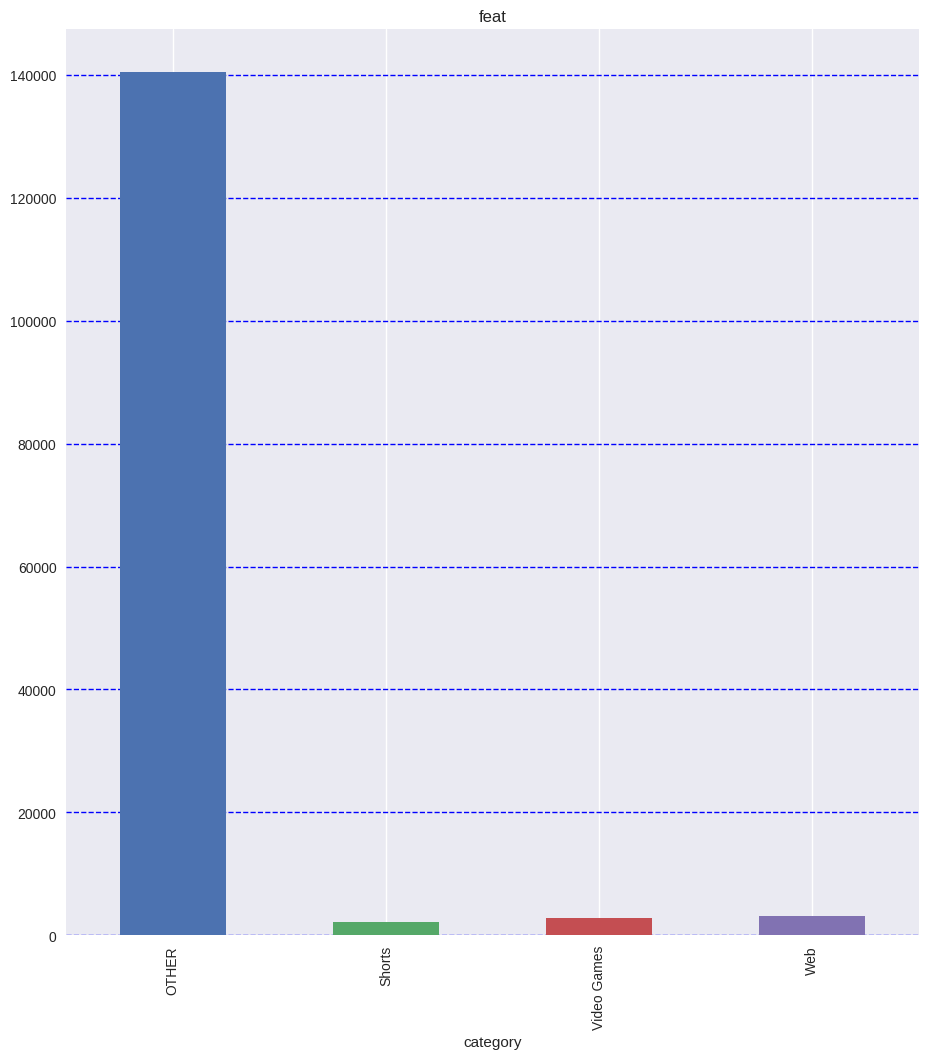

Processing main_category. Unique count: 15.
['Publishing' 'Art' 'Journalism' 'Photography' 'Comics' 'Film & Video'
 'Music' 'Technology' 'Theater' 'Design' 'Food' 'Dance' 'Fashion' 'Crafts'
 'Games']


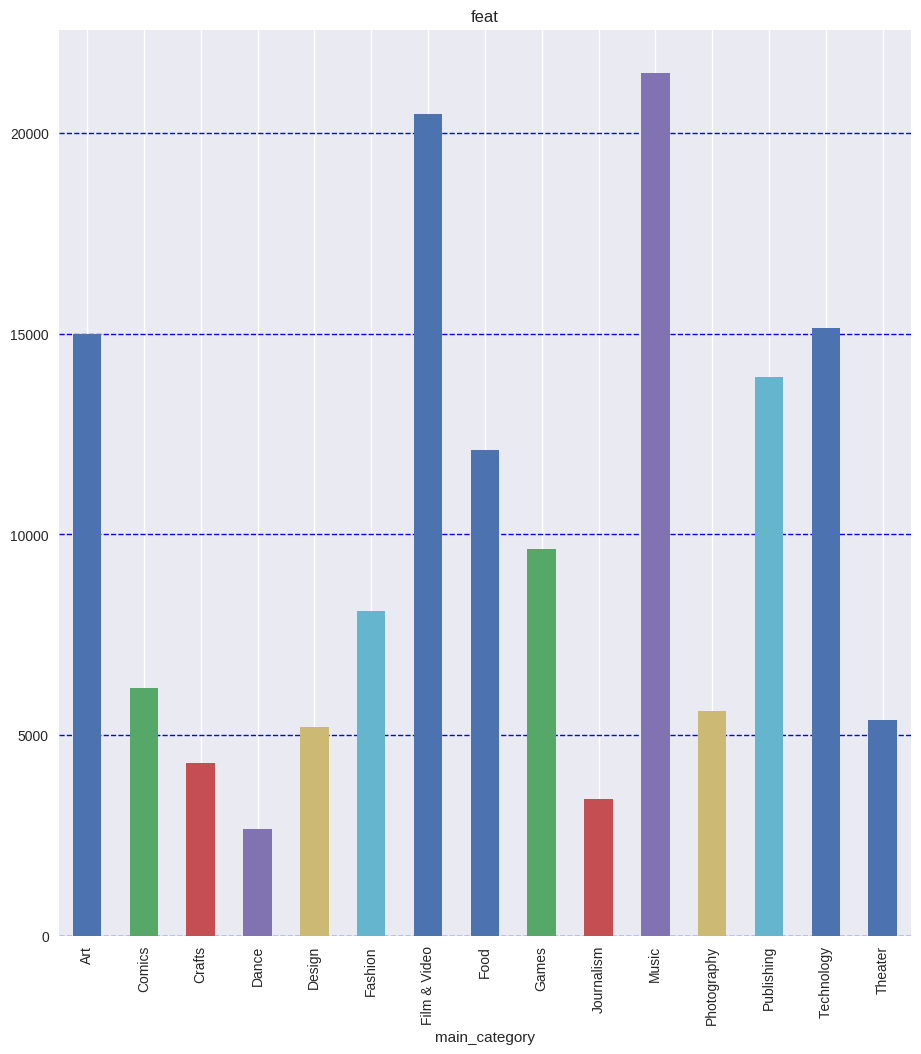

Processing state. Unique count: 2.
['successful' 'failed']


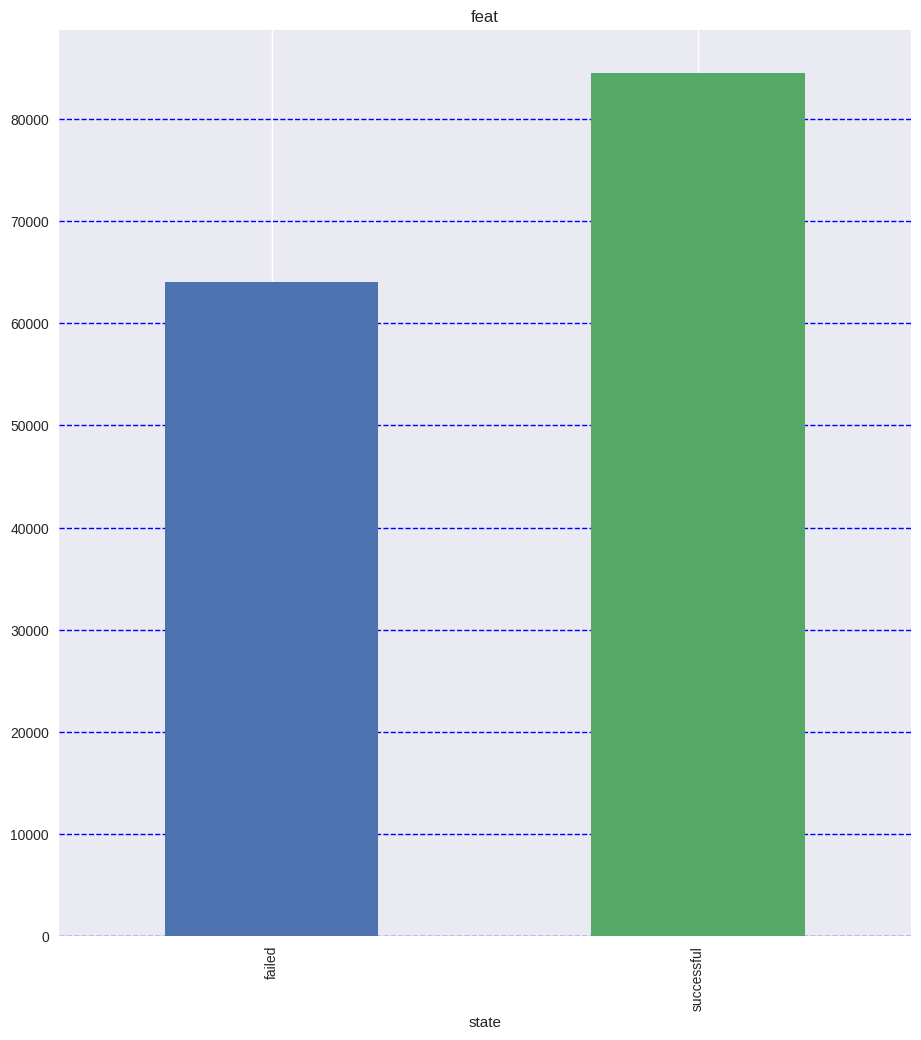

Processing country. Unique count: 22.
['US' 'GB' 'CA' 'AU' 'LU' 'NO' 'BE' 'AT' 'NZ' 'FR' 'SE' 'NL' 'ES' 'IE'
 'IT' 'DE' 'MX' 'DK' 'HK' 'SG' 'CH' 'JP']


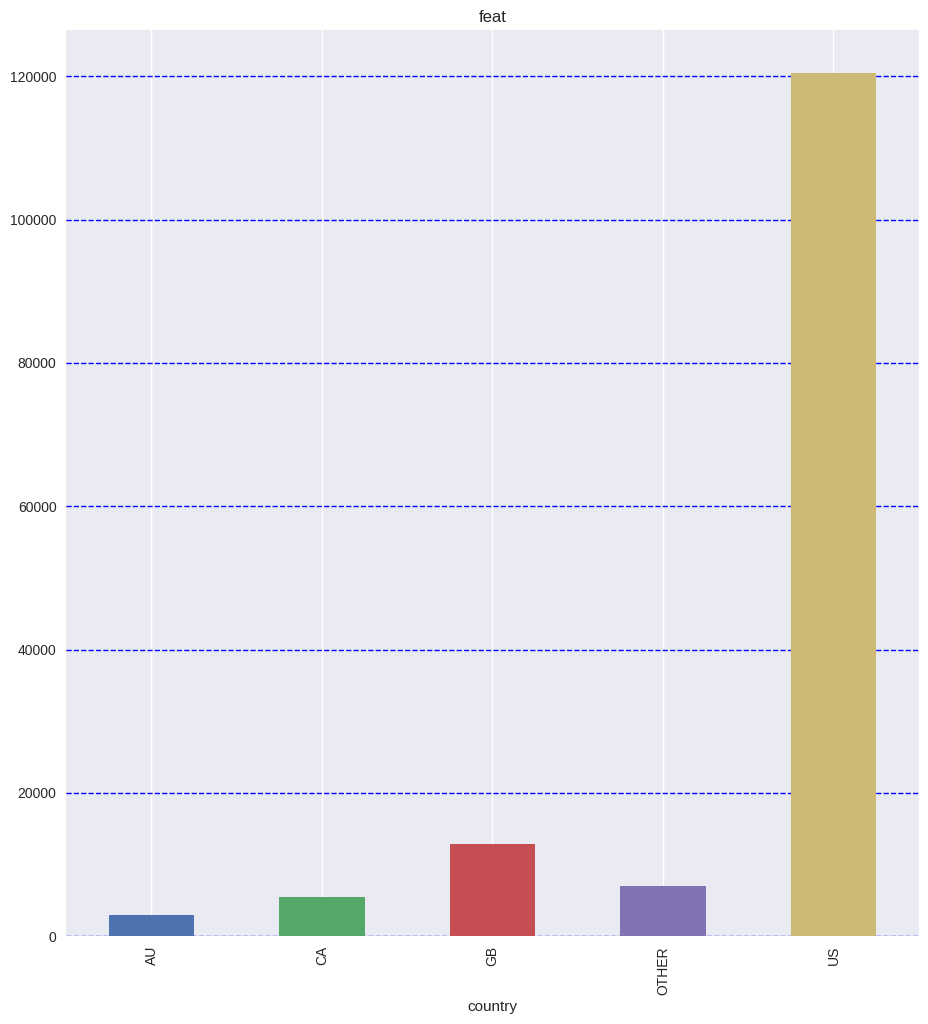

Processing currency. Unique count: 14.
['USD' 'GBP' 'CAD' 'AUD' 'EUR' 'NOK' 'NZD' 'SEK' 'MXN' 'DKK' 'HKD' 'SGD'
 'CHF' 'JPY']


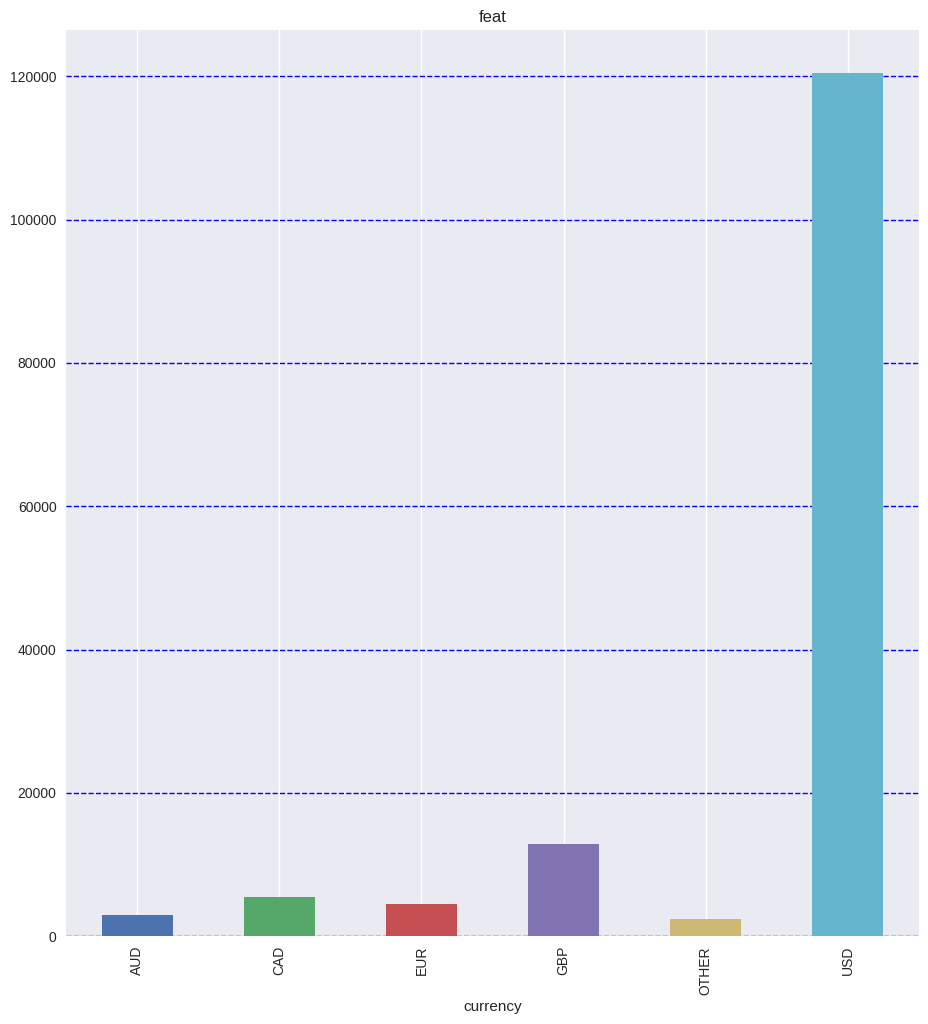

In [14]:
index_ = 1

#plt.subplots_adjust(hspace=3.5)
for feat in categorical_features:
  fig = plt.figure(figsize=(11,12), dpi=100)
  ax = fig.add_subplot(1,1,1)
  plt.subplots_adjust(hspace=0.5)
  uniques = data[feat].nunique()
  print("Processing {}. Unique count: {}.".format(feat, uniques))
  if uniques < 160:
    print(data[feat].unique())
    for feat_value in data[feat].unique():
      if (len(data[data[feat]==feat_value])) / n_items < 0.015:
        # print("Adding {} category to OTHER...".format(feat_value))
        data[feat] = data[feat].apply(lambda x: "OTHER" if x==feat_value else x, 1)
  counts = data.groupby(feat).count()
  #plt.subplot(len(categorical_features), 1, index_)
  index_ += 1
  counts.iloc[:,0].plot(kind='bar', ax=ax, figsize=(11,12), title='feat', grid=True)
  plt.grid(b=True, which='major', color='b', linestyle='--', axis='y')
  plt.show()

### Plotting main-categories separately

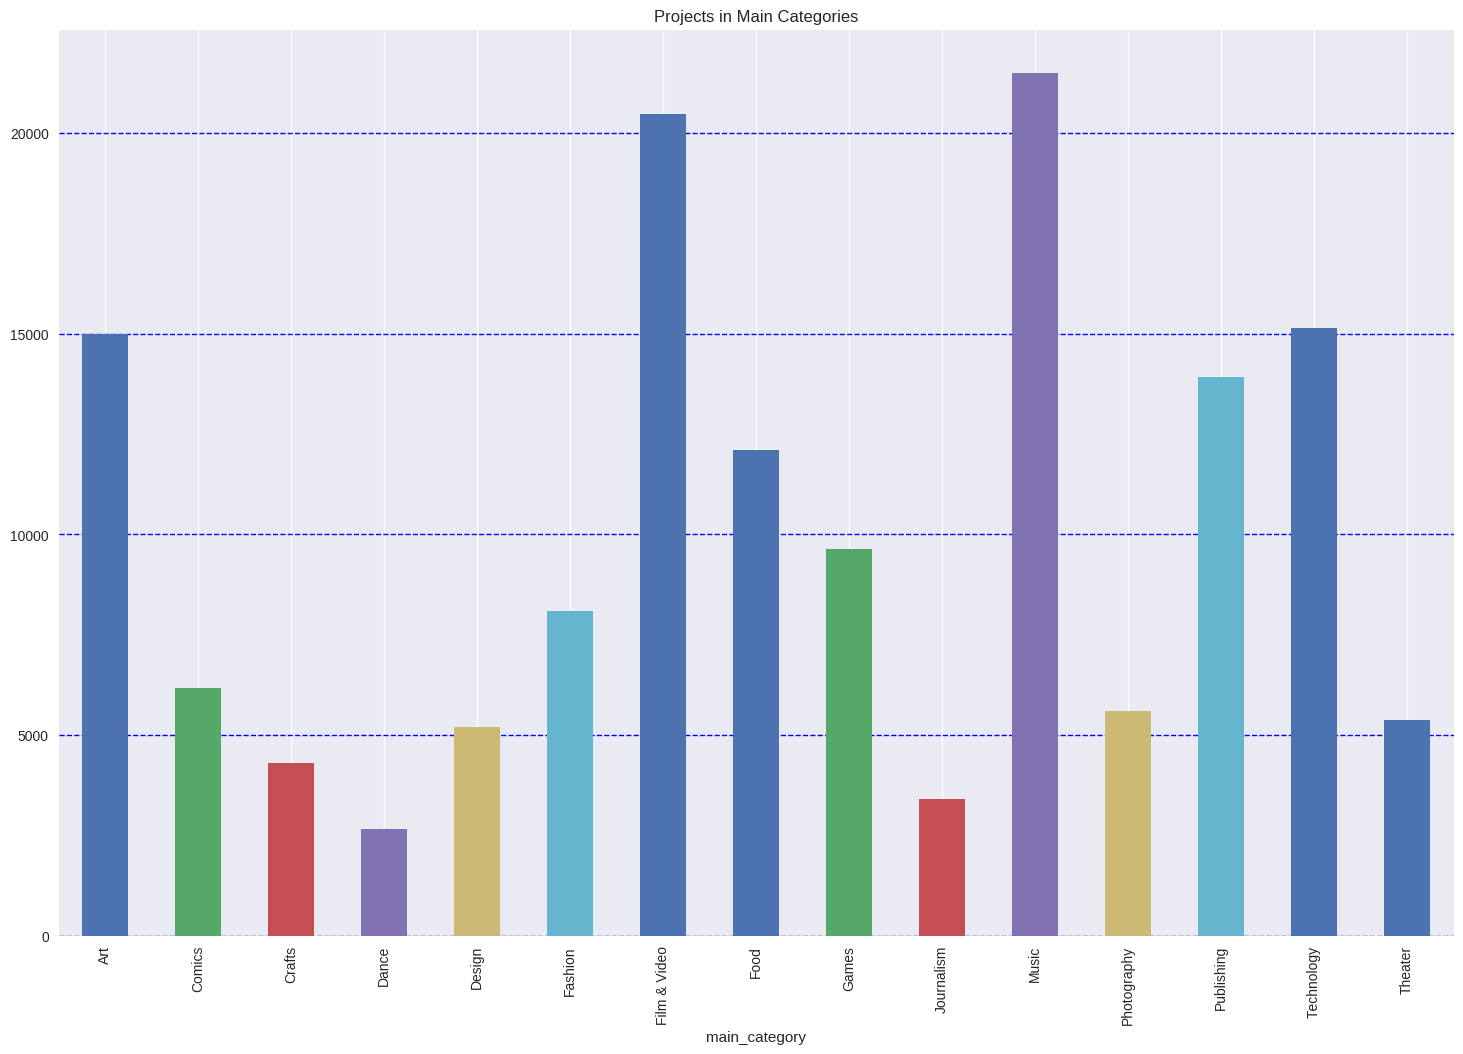

In [15]:
feat = 'main_category'  
fig = plt.figure(figsize=(18,12), dpi=100)
ax = fig.add_subplot(1,1,1)
plt.subplots_adjust(hspace=0.5)
uniques = data[feat].nunique()
counts = data.groupby(feat).count()
counts.iloc[:,0].plot(kind='bar', ax=ax, figsize=(18,12), title='Projects in Main Categories', grid=True)
plt.grid(b=True, which='major', color='b', linestyle='--', axis='y')
plt.show()

### Cleaning up the deepcopy

In [0]:
data = None

## Common Words

In [0]:
wordcount_name = dict()
wordcount_blurb = dict()

### Creating functions to count common words

In [0]:
def add_to_dict_name(words):
  words = words[2:-2].split("', '")
  for word in words:
    val = wordcount_name.get(word, None)
    if val is None:
      wordcount_name[word] = 1
    else:
      wordcount_name[word] = wordcount_name[word] + 1
    
def add_to_dict_blurb(words):
  words = words[2:-2].split("', '")
  for word in words:
    val = wordcount_blurb.get(word, None)
    if val is None:
      wordcount_blurb[word] = 1
    else:
      wordcount_blurb[word] = wordcount_blurb[word] + 1

In [19]:
df.cleaned_name.head(3)

0    ['change', 'jesus', 'neal', 'samudre', 'debut'...
1    ['client', 'vision', 'book', 'sell', 'without'...
2                   ['longest', 'lie', 'ever', 'tell']
Name: cleaned_name, dtype: object

### Counting words

In [0]:
tmp = df.cleaned_name.apply(lambda words: add_to_dict_name(words))
tmp = df.cleaned_blurb.apply(lambda words: add_to_dict_blurb(words))

In [21]:
print(len(wordcount_name))
print(len(wordcount_blurb))


67950
63900


### Displaying top 50 most common words in the project names

In [22]:
sorted(wordcount_name.items(), key=lambda x: x[1], reverse=True)[:50]

[('album', 5746),
 ('new', 5708),
 ('project', 5168),
 ('film', 4095),
 ('book', 3970),
 ('art', 3768),
 ('music', 3006),
 ('help', 2818),
 ('first', 2465),
 ('make', 2436),
 ('world', 2314),
 ('game', 2284),
 ('debut', 2102),
 ('short', 1894),
 ('ep', 1797),
 ('series', 1788),
 ('play', 1722),
 ('life', 1670),
 ('video', 1635),
 ('', 1578),
 ('tour', 1516),
 ('record', 1502),
 ('love', 1464),
 ('cards', 1365),
 ('food', 1332),
 ('cd', 1328),
 ('show', 1301),
 ('one', 1295),
 ('magazine', 1239),
 ('novel', 1179),
 ('festival', 1153),
 ('dance', 1148),
 ('app', 1140),
 ('get', 1124),
 ('story', 1083),
 ('go', 1067),
 ('studio', 1058),
 ('adventure', 1016),
 ('feature', 1001),
 ('dream', 957),
 ('design', 944),
 ('collection', 922),
 ('comic', 901),
 ('man', 889),
 ('home', 889),
 ('city', 889),
 ('release', 885),
 ('card', 875),
 ('fund', 861),
 ('live', 860)]

### Displaying top 50 most common names in the project blurbs

In [23]:
sorted(wordcount_blurb.items(), key=lambda x: x[1], reverse=True)[:50]

[('new', 12535),
 ('help', 11957),
 ('make', 10211),
 ('create', 8529),
 ('world', 7507),
 ('book', 7343),
 ('art', 6873),
 ('music', 6847),
 ('first', 6576),
 ('album', 6472),
 ('film', 5952),
 ('life', 5743),
 ('project', 5641),
 ('need', 5563),
 ('story', 5400),
 ('game', 5291),
 ('want', 4862),
 ('one', 4822),
 ('record', 4737),
 ('get', 4498),
 ('design', 4392),
 ('person', 4316),
 ('love', 4292),
 ('artist', 4212),
 ('year', 4204),
 ('bring', 4140),
 ('work', 3903),
 ('us', 3729),
 ('series', 3683),
 ('feature', 3676),
 ('show', 3655),
 ('take', 3425),
 ('time', 3400),
 ('fund', 3112),
 ('video', 3102),
 ('community', 3074),
 ('play', 3047),
 ('short', 2979),
 ('go', 2978),
 ('food', 2837),
 ('base', 2837),
 ('live', 2785),
 ('two', 2754),
 ('used', 2722),
 ('build', 2664),
 ('look', 2644),
 ('like', 2620),
 ('original', 2549),
 ('young', 2545),
 ('unique', 2515)]